# **LAB 1: Introduction to NLP**

**Natural Language Processing (NLP)** is a field of linguistics and machine learning focused on understanding everything related to human language. The aim of NLP tasks is not only to understand single words individually, but to be able to understand the context of those words.

# **Objectives:**
This lab is designed to introduce students to foundational Natural Language Processing (NLP) concepts and techniques. By the end of this lab, students will be familiar with several key NLP tasks and will have implemented basic examples for each. These tasks include:

1. Tokenization
2. Part-of-Speech (POS) Tagging
3. Word Sense Disambiguation
4. Dependency Parsing
5. Syntactic Parsing
6. Text Classification
7. Coreference Resolution
8. Named Entity Recognition (NER)
9. Natural Language Generation

# **Libraries Used:**

**Natural Language Toolkit** or [**NLTK**](https://www.nltk.org/) is one of the most famous libraries for Natural Language Processing, and is used to perform a veriety of NLP tasks. To go deep into the details of NLTK, you can consult this amazing book [Natural Language Processing with Python](https://www.nltk.org/book/)

There are some other libraries as well, which include [**SpaCy**](https://spacy.io/), [**HuggingFace Transformers**](https://huggingface.co/docs/transformers/main/en/index) and [**AllenNLP**](https://github.com/allenai/allennlp), but out main focus will be on this library.




# 1.  **Tokenization**


Tokenization is the process of splitting a text into individual components, such as words or sentences, called tokens. It is essential for further processing of text data.
## **Example:**

**Input Text**: "I love working with large language models."

**Word Tokenization**: ["I", "love", "working", "with", "large", "language", "models", "."]

**Character Tokenization**: ["I", " ", "l", "o", "v", "e", " ", "w", "o", "r", "k", "i", "n", "g", " ", "w", "i", "t", "h", " ", "l", "a", "r", "g", "e", " ", "l", "a", "n", "g", "u", "a", "g", "e", " ", "m", "o", "d", "e", "l", "s", "."]

The choice of tokenization depends on the use case.

## **Example Code:**

In [ ]:
# Import Libraries
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize, sent_tokenize

# Download the required tokenizer models
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Sample Text
text = "I love working with large language models. They are fascinating tools."

# Sentence Tokenization
sentences = sent_tokenize(text)
print("Sentences:", sentences)

# Word Tokenization
words = word_tokenize(text)
print("Words:", words)

Sentences: ['I love working with large language models.', 'They are fascinating tools.']
Words: ['I', 'love', 'working', 'with', 'large', 'language', 'models', '.', 'They', 'are', 'fascinating', 'tools', '.']


*Key points:*


*  `nltk.download('punkt')` is necessary to download the models for tokenization.


# 2.  **Part-of-Speech (POS) Tagging**


Part-of-Speech (POS) tagging involves assigning a part of speech (e.g., noun, verb, adjective) to each token.

It helps in understanding the grammatical structure of a sentence, which is vital for downstream tasks like parsing and entity recognition.

## **Example:**

**Input Sentence:**
"I love working with large language models."

**Word Tokenization:** ["I", "love", "working", "with", "large", "language", "models", "."]

**POS Tagging Output:**
* I - Pronoun (PRP)
* love - Verb (VBP)
* working - Verb (VBG)
* with - Preposition (IN)
* large - Adjective (JJ)
* language - Noun (NN)
* models - Noun (NNS)
* . - Punctuation (.)


## **Example Code:**

In [ ]:
from nltk import pos_tag
# Download the model for POS tagging
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
words = ["I", "have","to","fix","my","cycle","."]
pos_tags = pos_tag(words)
print("POS Tags:", pos_tags)

POS Tags: [('I', 'PRP'), ('have', 'VBP'), ('to', 'TO'), ('fix', 'VB'), ('my', 'PRP$'), ('cycle', 'NN'), ('.', '.')]


*Key points:*


* `pos_tag`: Assigns POS tags to each word in the tokenized list.

* Requires tokenized input.




# 3.  **Word Sense Disambiguation (WSD)**
Word sense disambiguation determines the correct meaning of a word based on context.

## **Example:**
**Sentence 1:**
"The bark of the tree was rough."

**Sentence 2:**
"The dog started to bark loudly."

In Sentence 1, "bark" refers to the outer layer of a tree, while in Sentence 2, "bark" refers to the sound a dog makes.


## **How WSD Works:**

**Contextual Clues:** The surrounding words provide hints about the meaning of the ambiguous word. The surrounding words help distinguish whether "bark" refers to the tree part (noun) or the dog’s sound (verb).

**Sense Selection:** It chooses the word sense (meaning) that best matches the context using methods like rule-based (e.g., Lesk) or machine learning models.






## **Example Code:**

In [ ]:
from nltk.corpus import wordnet
from nltk.wsd import lesk

# Download WordNet data
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
word = "bark"

# Get all possible definitions for the word
definitions = wordnet.synsets(word)

print(f"Definitions for '{word}':")
for syn in definitions:
    print(f"- {syn.definition()}")

Definitions for 'bark':
- tough protective covering of the woody stems and roots of trees and other woody plants
- a noise resembling the bark of a dog
- a sailing ship with 3 (or more) masts
- the sound made by a dog
- speak in an unfriendly tone
- cover with bark
- remove the bark of a tree
- make barking sounds
- tan (a skin) with bark tannins


Now, this code prints all possible definition of the word given as input. Let's define a sentence for disambiguation:

In [ ]:
# Define a sentence
sentence = "The dog started to bark loudly."

# Perform WSD using Lesk algorithm
sense = lesk(nltk.word_tokenize(sentence), "bark")

# Print out the sense and its definition
print(f"Chosen sense of 'bark': {sense}")
print(f"Definition: {sense.definition()}")

Chosen sense of 'bark': Synset('bark.n.02')
Definition: a noise resembling the bark of a dog


*Key points:*
* `wordnet.synset` function retrieves all possible meanings of a word, which can be narrowed down based on its context.
* `lesk()` function applies the Lesk algorithm. It is a simple but effective method for WSD. It works by choosing the sense of a word based on the overlap between the context of the word in the sentence and the definitions of its possible senses in a lexical resource like WordNet. It requires a tokenized input.

# 4.  **Dependency Parsing**

Dependency parsing determines the grammatical relationships between words in a sentence, like which word depends on which other word in the sentence. It helps understand the syntactic structure and dependencies.

## **Example:**
**Input Sentence:**
"I love working with large language models."

**Dependency Parsing Output:**
* "I" → Subject of "love"
* "love" → Main verb (root)
* "working" → Verb phrase dependent on "love"
* "with" → Preposition connecting "working" to "large"
* "large" → Adjective modifying "language"
* "language" → Noun modified by "large"
* "models" → Noun object of "language"

## **Example Code:**

In [ ]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Process sentence
sentence = "NLP is fascinating."
doc = nlp(sentence)

# Print dependency relations
print("Dependency Parsing:")
for token in doc:
    print(f"{token.text} --> {token.dep_} --> {token.head.text}")

Dependency Parsing:
NLP --> nsubj --> is
is --> ROOT --> is
fascinating --> acomp --> is
. --> punct --> is


You can also visualise the results as follows:

In [ ]:
from spacy import displacy
# Visualize the dependency parsing
displacy.serve(doc, style="dep")

/usr/local/lib/python3.11/dist-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


*Key points:*
* `token.text`: The actual word being analyzed
* `token.dep_`: The dependency label describing the grammatical role of the word (e.g., nsubj for subject, prep for preposition).
* `token.head.text`: Points to the word the token depends on.



# 5.  **Syntactic Parsing**
Syntactic parsing, is the process of analyzing the grammatical structure of a sentence. It creates a parse tree, which represents the hierarchical structure of a sentence according to a given grammar. This helps in understanding how words and phrases relate to one another.

## **Important Concepts:**
* **Grammar Rules (CFG - Context-Free Grammar)**: A set of formal rules that specify how sentences can be constructed.

* **Parse Tree**: A tree-like structure representing the grammatical hierarchy of a sentence.

* **Parser Types:**

  (i) Top-down parsers: Start from the root and break down into parts.

  (ii) Bottom-up parsers: Start from the words and build up to the sentence.

## **Example Code:**







In [ ]:
from nltk import CFG
from nltk.parse import RecursiveDescentParser

# Define a grammar for parsing

grammar = CFG.fromstring("""
    S -> NP VP
    NP -> Det N
    VP -> V NP
    Det -> 'the' | 'a'
    N -> 'dog' | 'cat' | 'mat'
    V -> 'chased' | 'sat'
""")

# Explanation:
# S -> Sentence which represents the root node.
# NP -> Noun Phrase which represents the subject (e.g., "the dog")
# VP -> Verb Phrase which represents the predicate (e.g., "chased the cat")
# Det -> Determiner (e.g., "the")
# N -> Noun (e.g., "dog", "cat")
# V -> Verb (e.g., "chased")


# Create a parser using Recursive Descent Parsing
parser = RecursiveDescentParser(grammar)

# Define the sentence to parse
sentence = ['the', 'dog', 'chased', 'the', 'cat']

# Parse the sentence and display results

print("Parse Tree(s):")
for tree in parser.parse(sentence):
    print(tree)
    tree.pretty_print()


Parse Tree(s):
(S (NP (Det the) (N dog)) (VP (V chased) (NP (Det the) (N cat))))
              S               
      ________|_____           
     |              VP        
     |         _____|___       
     NP       |         NP    
  ___|___     |      ___|___   
Det      N    V    Det      N 
 |       |    |     |       |  
the     dog chased the     cat



*Key points:*
* Grammar rules define the structure of valid sentences.

* The `RecursiveDescentParser()` constructs parse trees based on the defined grammar.


* `pretty_print()` shows visual representation of the tree.

# 6.  **Text Classification**

Text Classification is the process of categorizing text into pre-defined groups.

Spam/Ham Classification, Article/Blog Categorization and Sentiment Analysis are some examples. We will discuss sentiment analysis in detail in this lab.

## **Sentiment Analysis**
Sentiment analysis determines the emotional tone of a text (positive, negative, or neutral). It is commonly used in customer feedback analysis and social media monitoring.

## **Example**
**Input Text:** My brother is happy.

This conveys a positive sentiment because it describes a happy emotional state.

## **Example Code:**

In [ ]:
from textblob import TextBlob

text = "I hate mathematics"

# Analyze sentiment
blob = TextBlob(text)
print("Sentiment:", blob.sentiment)

Sentiment: Sentiment(polarity=-0.8, subjectivity=0.9)


*Key points:*
* `TextBlob.sentiment`: Returns polarity (positive/negative score) and subjectivity (opinion vs fact).
* **Polarity**: A float value between -1.0 (negative sentiment) and 1.0 (positive sentiment). The higher the polarity, the more positive the sentiment. For example:

      Polarity = 0.75: Strong positive sentiment.
      Polarity = -0.5: Moderate negative sentiment.
      Polarity = 0.0: Neutral sentiment (neither positive nor negative).






* **Subjectivity**: A float value between 0.0 (objective, factual) and 1.0 (subjective, opinion). Higher subjectivity means the text is more opinion-based or personal. For example:
      Subjectivity = 0.1: Very objective (factual).
      Subjectivity = 0.9: Very subjective (opinion-based).
      Subjectivity = 0.5: Balanced between factual and opinion-based.

# 7. **Coreference Resolution**

Coreference resolution is the task of identifying all the expressions (e.g., pronouns, names) in a text that refer to the same entity, and linking them together.

It is a crucial task in NLP as it enables a system to maintain a consistent representation of entities throughout a document, enabling more accurate information extraction and text understanding.

## **Example:**


**Input Text:** "Marie was born in Paris. She loves the museums."

**Coreference Resolution Output:** "Marie was born in Paris. **Marie** loves the museums.


In this example, Marie and She are coreferent.

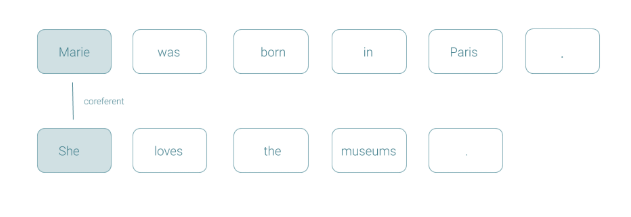

<font size=2> Image Courtesy: [CoreNLP](https://stanfordnlp.github.io/CoreNLP/#coreference) <font>



## Example Code:

In [ ]:
# Installing the library
!pip install fastcoref -q

# Import coref library
from fastcoref import FCoref

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# Initialize the coreference resolution model
model = FCoref() # use FCoref(device='cuda:0') if GPU available

# Input text
text = "Alex said that he wants to go home. Later, Peter gave him car keys saying it shall be returned on Monday."

# Perform coreference resolution
preds = model.predict(texts=[text])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/362M [00:00<?, ?B/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Print clusters
print(preds[0].get_clusters(as_strings=True))

# Print resolved text
resolved_text = text
for cluster in preds[0].get_clusters():
    main_ref = cluster[0]  # Use the first element of the cluster as the reference
    for mention in cluster[1:]:
        resolved_text = resolved_text.replace(mention, main_ref)

print("\nResolved Text:", resolved_text)

[['Alex', 'he', 'him'], ['car keys', 'it']]

Resolved Text: Alex said that Alex wants to go home. Later, Peter gave Alex car keys saying car keys shall be returned on Monday.


*Key Points*
* `FCoref()` function from fastcoref library is used to instantiate a coreference resolution model, which predicts coreference clusters.
* `preds[0].get_clusters()` extracts the clusters of coreferent mentions.
* `resolved_text` is basically the input text, but with the coreferent entities replaced by their corresponding main entity.

# 8. **Named Entity Recognition (NER)**

Named Entity Recognition (NER) is the process of identifying and categorizing named entities in a text, such as people, organizations, locations, and dates.

## **Example:**

**Input Text:** "Google was founded by Larry Page and Sergey Brin while they were Ph.D. students at Stanford University."

**NER Output:**

"Google" → Organization |
"Larry Page" → Person |
"Sergey Brin" → Person |
"Stanford University" → Organization


## **Example Code:**

In [ ]:
# Import Libraries
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
from nltk import word_tokenize, ne_chunk, pos_tag

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
# Input Text
text = "Google was founded by Larry Page and Sergey Brin while they were Ph.D. students at Stanford University."

# Tokenize the Sentence
tokens = word_tokenize(text)

# Compute POS Tags
pos_tags = pos_tag(tokens)

# Perform NER
named_entities = ne_chunk(pos_tags)
print(named_entities)

(S
  (PERSON Google/NNP)
  was/VBD
  founded/VBN
  by/IN
  (PERSON Larry/NNP Page/NNP)
  and/CC
  (PERSON Sergey/NNP Brin/NNP)
  while/IN
  they/PRP
  were/VBD
  Ph.D./NNP
  students/NNS
  at/IN
  (ORGANIZATION Stanford/NNP University/NNP)
  ./.)


In [ ]:
# Visualising/Printing as a Tree
named_entities.pretty_print()

                                                                           S                                                                                                                         
    _______________________________________________________________________|___________________________________________________________________________________________________                       
   |         |        |     |       |        |        |         |          |         |    |    PERSON             PERSON                     PERSON                       ORGANIZATION               
   |         |        |     |       |        |        |         |          |         |    |      |           _______|_______           ________|_______            ____________|_____________         
was/VBD founded/VBN by/IN and/CC while/IN they/PRP were/VBD Ph.D./NNP students/NNS at/IN ./. Google/NNP Larry/NNP        Page/NNP Sergey/NNP        Brin/NNP Stanford/NNP              University/NNP



We can visualize the them in a more user-friendly way without POS tags, by extracting only the Named Entities or NEs (Tree objects) from the parsed result

In [ ]:
from nltk.tree import Tree

# Extract named entities from the output tree
entities = []
for subtree in named_entities:
    if isinstance(subtree, Tree):  # Check if it is a named entity
        entity = " ".join([token for token, pos in subtree.leaves()])
        entity_type = subtree.label()
        entities.append((entity, entity_type))

# Display named entities in a clear format
print("Named Entities:")
for entity, entity_type in entities:
    print(f"{entity} ({entity_type})")

Named Entities:
Google (PERSON)
Larry Page (PERSON)
Sergey Brin (PERSON)
Stanford University (ORGANIZATION)


*Key Points*
* Tokenization and POS Tagging are necessary prior to NER
* `nltk.download('maxent_ne_chunker')` is necessary for `ne_chunk()` to perform NER, as it provides the required model.
* `ne_chunk` outputs a tree structure, where subtrees are NEs and leaves are non-entity tokens. The **S** represents sentence.
* The Entities and Entity Types can be extracted by traversing through the nodes of the output tree


# 9. **Natural Language Generation**

Natural Language Generation (NLG) is a process driven by artificial intelligence that produces natural written or spoken language from structured and unstructured data.

It is used in automated reporting, conversational AI (e.g., chatbots), summarization, and storytelling. Let's discuss summarization in detail in this lab.
## **Text Summarization**
There are two different kinds of summarization techniques:

1.   Extractive Summarization: Selects and combines important sentences from the original text to create a concise summary without changing the content.

2.   Abstractive Summarization: Generates a concise summary by  paraphrasing the original text which represents the core meaning of the text.


Since NLG involves the generation of new words/sentences particularly, so our main focus is to implement abstractive summarization in this lab.

## **Example Code:**


In [ ]:
# Import the transformers pipline
from transformers import pipeline

In [ ]:
# Input text
input_text = """
In its latest report, scientists highlight that greenhouse gas emissions must be reduced by 45% by 2030 to limit temperature
rise to 1.5 degrees Celsius above pre-industrial levels. Failure to achieve this target could result in severe consequences,
including rising sea levels, extreme weather events, and biodiversity loss.
"""

# Initialize the summarization pipeline
summarizer = pipeline("summarization", model="t5-base")

# Pass the input text to the summarizer
abstractive_summary = summarizer(input_text, max_length=50, min_length=25, do_sample=False)

# Display results
print("\nAbstractive Summary:")
print(abstractive_summary[0]['summary_text'])

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]


Abstractive Summary:
greenhouse gas emissions must be reduced by 45% by 2030 to limit temperature rise . failure to achieve this target could result in rising sea levels, extreme weather events .


*Key Points*
*
* `pipeline()` function from the Transformers library is used to instantiate/initialize a pre-trained model for a specific task. In this case, it's set up for summarization, with `t5-base` as the model being used for generating summaries.
* `summarizer()` function takes input and generates a summary, having output length between `min_length` and `max_length`.
* `do_sample = False` ensures that the generated summary is predictable and accurate.

# **Deliverables**

# **Task:** **News Article Analysis**

*Develop a system that processes a corpus of text (4-5 sentences) from your favourite news article to extract meaningful insights by utilizing various NLP techniques.*





## **1. Tokenization**

In [ ]:
# Insert Code Here

## **2. Part-of-Speech (POS) Tagging**



In [ ]:
# Insert Code Here

## **3. Word Sense Disambiguation (WSD)**

In [ ]:
# Insert Code Here

## **4. Dependency Parsing**

In [ ]:
# Insert Code Here

## **5. Syntactic Parsing**

In [ ]:
# Insert Code Here

## **6. Text Classification**
*Perform sentiment analysis.*

In [ ]:
# Insert Code Here

## **7. Coreference Resolution**

In [ ]:
# Insert Code Here

## **8. Named Entity Recognition (NER)**

In [ ]:
# Insert Code Here

## **9. Natural Language Generation**
*Perform abstractive summarization.*

In [ ]:
# Insert Code Here